In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
from pathlib import Path

In [2]:
# Data Collection
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Open file dialog
Tk().withdraw()  # Hide main Tkinter window
file_path = askopenfilename(filetypes=[("CSV files", "*.csv")])

# Read the selected CSV file
df = pd.read_csv(file_path)
df.head()


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [4]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [7]:
# check the null values
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [11]:
# Split Dataset into Features(x) and Target variable(y)
x = df.drop('Price',axis=1)
y = np.log1p(df['Price'])

print("X shape: ",x.shape)
print("Y shape: ",y.shape)

X shape:  (1273, 12)
Y shape:  (1273,)


In [13]:
#Inentify the Categorical and Numerical Columns
categorical_features = x.select_dtypes(include=['object']).columns.tolist()
numerical_features = x.select_dtypes(include=[np.number]).columns.tolist()

#print the Categorical and Numerical Columns
print(categorical_features)
print(numerical_features)

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']
['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']


In [14]:
#Split dataset into Train(80%) and Test(20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1018, 12)
X_test shape: (255, 12)
y_train shape: (1018,)
y_test shape: (255,)


In [15]:
## preprocess the data
    # (01) Detect categorical and numerical columns
    # (02) Use StandardScaler for Numerical
    # (03) use One Hot Encoder for Categorical

preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)
    ]
)

In [ ]:
##Try the model with LinearRegression Algorithm

In [17]:
#Try the model with LinearRegression Algorithm
model_lr = Pipeline(steps=[('preprocessor',preprocessor),
                          ('regressor',LinearRegression())
                          ])

model_lr.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
y_pred_lr = model_lr.predict(x_test)

In [21]:
# data evaluation
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression - R-squared: {r2_lr:.4f} ")
print(f"Linear Regression - Mean Squared Error: {mse_lr:.4f}")
print(f"Linear Regression - Root Mean Squared Error: {rmse_lr:.4f}")

Linear Regression - R-squared: 0.8084 
Linear Regression - Mean Squared Error: 0.0006
Linear Regression - Root Mean Squared Error: 0.0235


In [ ]:
##Try the model with DecisionTreeRegressor Algorithm

In [22]:
model_dt = Pipeline(steps=[('preprocessor',preprocessor),
                          ('regressor',DecisionTreeRegressor(random_state=42))
                          ])

model_dt.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
y_pred_dt = model_dt.predict(x_test)

In [25]:
# data evaluation
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"DecisionTreeRegressor - R-squared: {r2_dt:.4f} ")
print(f"DecisionTreeRegressor- Mean Squared Error: {mse_dt:.4f}")
print(f"DecisionTreeRegressor - Root Mean Squared Error: {rmse_dt:.4f}")

DecisionTreeRegressor - R-squared: 0.8388 
DecisionTreeRegressor- Mean Squared Error: 0.0005
DecisionTreeRegressor - Root Mean Squared Error: 0.0215


In [ ]:
##Try the model with RandomForestRegressor Algorithm

In [26]:
model_rf = Pipeline(steps=[('preprocessor',preprocessor),
                          ('regressor',RandomForestRegressor(n_estimators=50,random_state=42,n_jobs=1))
                          ])

model_rf.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
y_pred_rf = model_rf.predict(x_test)

In [28]:
#data evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - R-squared: {r2_rf:.4f}")
print(f"Random Forest - Mean Squared Error: {mse_rf:.4f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf:.4f}")

Random Forest - R-squared: 0.8911
Random Forest - Mean Squared Error: 0.0003
Random Forest - Root Mean Squared Error: 0.0177


In [ ]:
## Compare the model_lr vs model_dt vs model_rf

Model Performance Comparison:


,Model,R-squared,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.808419,0.000551,0.023478
1,Decision Tree,0.838832,0.000464,0.021534
2,Random Forest,0.891108,0.000313,0.017701


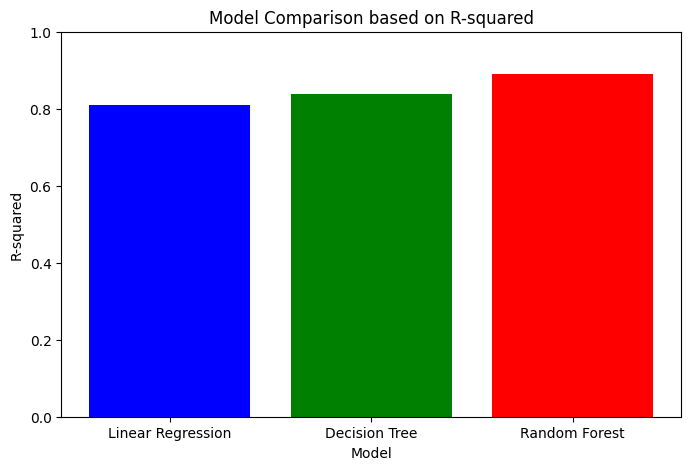

In [29]:
# Compare the performance metrics of the three models
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_values = [r2_lr, r2_dt, r2_rf]
mse_values = [mse_lr, mse_dt, mse_rf]
rmse_values = [rmse_lr, rmse_dt, rmse_rf]

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': r2_values,
    'Mean Squared Error': mse_values,
    'Root Mean Squared Error': rmse_values
})

# Display the metrics table
print("Model Performance Comparison:")
display(metrics_df)

# Visualize the R-squared values
plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison based on R-squared')
plt.ylim(0, 1) # R-squared is between 0 and 1
plt.show()

In [30]:

#select the most accurate model and save it
best_model = model_rf

#save the best model

filename = 'laptop_price_predictor_model.joblib'

joblib.dump(best_model, filename)

print(f"\n Best model (Random Forest pipeline) has been saved as '{filename}'.")


 Best model (Random Forest pipeline) has been saved as 'laptop_price_predictor_model.joblib'.


In [31]:
loaded_model = joblib.load('laptop_price_predictor_model.joblib')
print("✅ Model loaded successfully.")

sample_laptop = pd.DataFrame([{
    'Company': 'Apple',
    'TypeName': 'Ultrabook',
    'Ram': 16,
    'Weight': 1.37,
    'TouchScreen': 0,
    'Ips': 1,
    'Ppi': 226.98,
    'Cpu_brand': 'Intel Core i5',
    'HDD': 0,
    'SSD': 512,
    'Gpu_brand': 'Intel',
    'Os': 'Mac'
}])
print("\nPredicting price for this laptop:")
print(sample_laptop)

predicted_log_price = loaded_model.predict(sample_laptop)

predicted_price = np.expm1(predicted_log_price)


print(f"Predicted Price: ${predicted_price[0]:,.2f}")

✅ Model loaded successfully.

Predicting price for this laptop:
  Company   TypeName  Ram  Weight  TouchScreen  Ips     Ppi      Cpu_brand  \
0   Apple  Ultrabook   16    1.37            0    1  226.98  Intel Core i5   

   HDD  SSD Gpu_brand   Os  
0    0  512     Intel  Mac  
Predicted Price: $11.72
